In [1]:
# Import matplotlib and numpy for charting
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# Files To Load
restaurant_sales_to_load = Path("restaurant_sales.csv")
vehicle_sales_to_load = Path("vehicle_sales.csv")

#Read Restaurant and Vehicle Data Files and store into Pandas DataFrames
restaurant_sales = pd.read_csv(restaurant_sales_to_load)
vehicle_sales = pd.read_csv(vehicle_sales_to_load)

#Combine the Data into a single dataset
sales_data_complete = pd.merge(restaurant_sales, vehicle_sales, how="left")
sales_data_complete

,DATE,MRTSSM7225USN,TOTALSA
0,1992-01-01,13325.0,12.591
1,1992-02-01,13474.0,12.927
2,1992-03-01,14346.0,12.824
3,1992-04-01,14065.0,12.550
4,1992-05-01,15077.0,13.098
...,...,...,...
375,2023-04-01,79298.0,16.210
376,2023-05-01,83588.0,16.079
377,2023-06-01,83171.0,16.602
378,2023-07-01,84580.0,16.442


In [2]:
# Change data to datetime
sales_data_complete["DATE"] = pd.to_datetime(sales_data_complete["DATE"])
sales_data_complete.head()
# Change decimal place for vehicle units
sales_data_complete.set_index("DATE").tail()
sales_data_complete["TOTALSA"] = sales_data_complete["TOTALSA"] * 1000


In [3]:
# Narrow data to the years COVID-19 occurred
covid_sales_df = sales_data_complete[sales_data_complete["DATE"].between('2020-01-01','2023-06-01')]

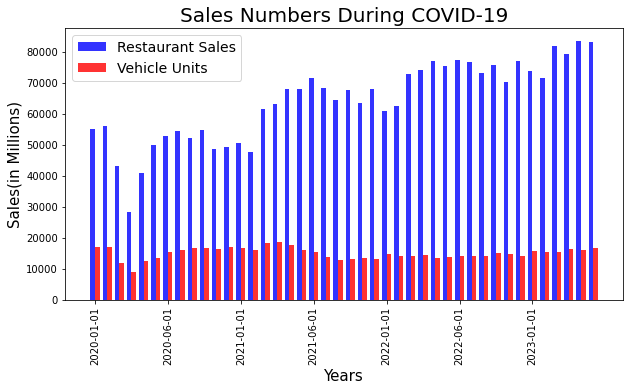

<Figure size 720x576 with 0 Axes>

In [49]:
# Plot Graph
fig, ax = plt.subplots (figsize=(10,5))
width = 1.5

labels = ['2020-01-01', '2020-06-01', '2021-01-01', '2021-06-01', '2022-01-01', '2022-06-01', '2023-01-01', '2023-06-01']
ind = np.arange(covid_sales_df.shape[0]) * 4
plt.bar(ind, covid_sales_df['MRTSSM7225USN'], alpha=.8, color="b", align="center", width=width)
plt.bar(ind + width, covid_sales_df['TOTALSA'], alpha=.8, color="r", align="center", width=width)
ax.set_xlabel('Years', fontsize = 15)
plt.ylabel('Sales(in Millions)')
ax.set_ylabel('Sales(in Millions)', fontsize = 15)
ax.set_title('Sales Numbers During COVID-19', fontsize=20)
plt.xticks(ind + width / 2, labels, rotation = 90)
plt.legend(["Restaurant Sales", "Vehicle Units"], loc ="upper left", fontsize=14)
plt.locator_params(axis='x', nbins=8.3)


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)


plt.show()



In [5]:
#Save Image
plt.savefig("covid_box.png")

<Figure size 432x288 with 0 Axes>